In [1]:
%matplotlib inline
import time
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image, ImageOps

from ssim import SSIM
from ssim.utils import get_gaussian_kernel

gaussian_kernel_sigma = 1.5
gaussian_kernel_width = 11
gaussian_kernel_1d = get_gaussian_kernel(gaussian_kernel_width, gaussian_kernel_sigma)


In [2]:
size = (256,256)

im = Image.open('test-images/test3-orig.jpg')
im = im.resize(size, Image.LANCZOS)

# slightly rotated image
im_rot = Image.open('test-images/test3-rot.jpg')
im_rot = im_rot.resize(size, Image.LANCZOS)

# slightly modified lighting conditions
im_lig = Image.open('test-images/test3-lig.jpg')
im_lig = im_lig.resize(size, Image.LANCZOS)

# image cropped
im_cro = Image.open('test-images/test3-cro.jpg')
im_cro = im_cro.resize(size, Image.LANCZOS)

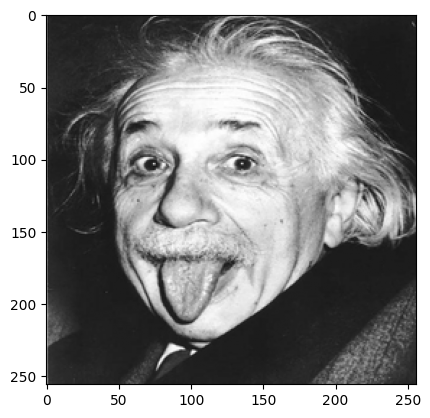

In [3]:
im_gray = ImageOps.grayscale(im)
plt.imshow(np.asarray(im_gray),cmap='gray',vmin=0,vmax=255)

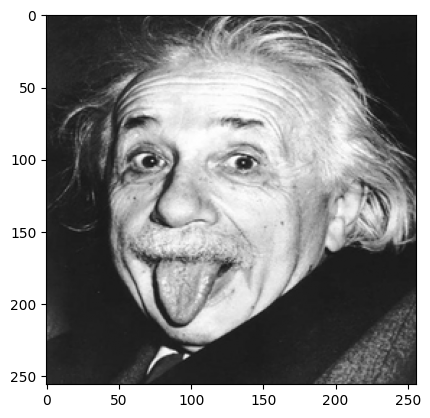

In [4]:
im_rot_gray = ImageOps.grayscale(im_rot)
plt.imshow(np.asarray(im_rot_gray),cmap='gray',vmin=0,vmax=255)

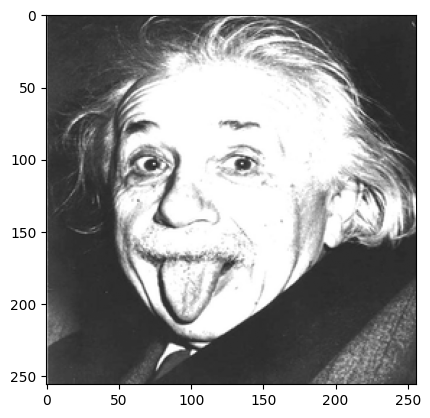

In [5]:
im_lig_gray = ImageOps.grayscale(im_lig)
plt.imshow(np.asarray(im_lig_gray),cmap='gray',vmin=0,vmax=255)

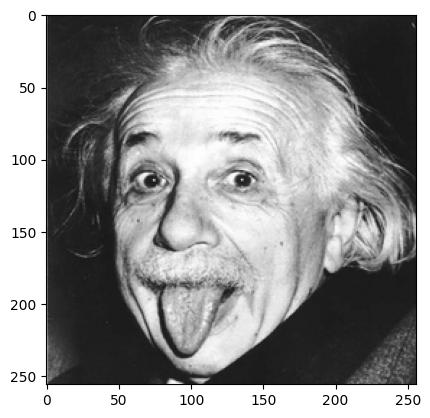

In [6]:
im_cro_gray = ImageOps.grayscale(im_cro)
plt.imshow(np.asarray(im_cro_gray),cmap='gray',vmin=0,vmax=255)

In [7]:
start = time.time()
ssim_rot = SSIM(im, gaussian_kernel_1d).ssim_value(im_rot)
ssim_lig = SSIM(im, gaussian_kernel_1d).ssim_value(im_lig)
ssim_cro = SSIM(im, gaussian_kernel_1d).ssim_value(im_cro)
end = time.time()

print("SSIM of rotated image %.4f" % ssim_rot)
print("SSIM of modified lighting image %.4f" % ssim_lig)
print("SSIM of cropped image %.4f" % ssim_cro)
print("Elapsed time of SSIM is %.6fs" % (end - start))

SSIM of rotated image 0.4797
SSIM of modified lighting image 0.8433
SSIM of cropped image 0.3736
Elapsed time of SSIM is 0.033967s


In [8]:
start = time.time()
cw_ssim_rot = SSIM(im).cw_ssim_value(im_rot)
cw_ssim_lig = SSIM(im).cw_ssim_value(im_lig)
cw_ssim_cro = SSIM(im).cw_ssim_value(im_cro)
end = time.time()

print("CW-SSIM of rotated image %.4f" % cw_ssim_rot)
print("CW-SSIM of modified lighting image %.4f" % cw_ssim_lig)
print("CW-SSIM of cropped image %.4f" % cw_ssim_cro)
print("Elapsed time of CW-SSIM is %.6fs" % (end - start))

CW-SSIM of rotated image 0.8726
CW-SSIM of modified lighting image 0.9668
CW-SSIM of cropped image 0.7173
Elapsed time of CW-SSIM is 0.591086s


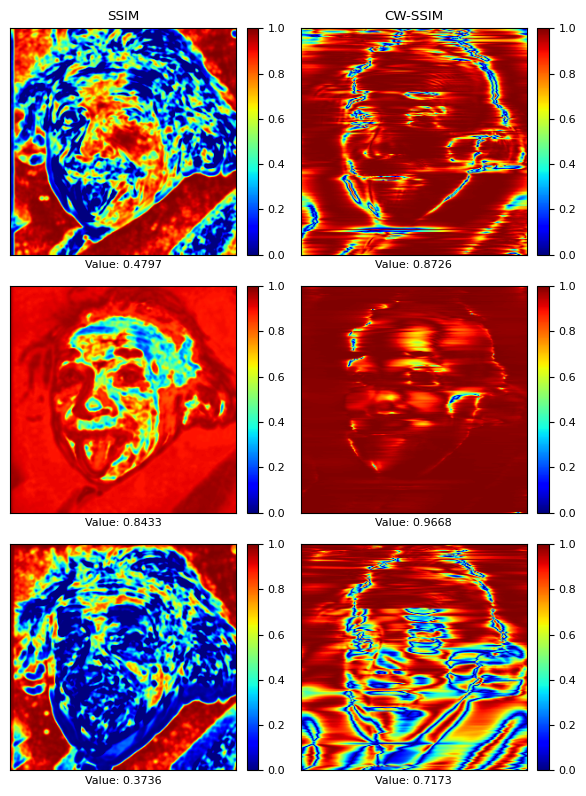

In [66]:
# SSMI map
def plot(map, subplot_index, value=None):
    plt.subplot(*subplot_index)
    plt.imshow(np.reshape(map, size), cmap='jet', vmin=0, vmax=1)
    if value is not None:
        plt.xlabel('Value: %.4f' % value)
    plt.gca().set_xticks([])
    plt.gca().set_yticks([])
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.tight_layout()

plt.figure(figsize=(6,8))
plt.tight_layout()
plt.rcParams.update({'font.size': 8})

ssim_map = SSIM(im, gaussian_kernel_1d).ssim_map(im_rot)
plot(ssim_map, (3,2,1), ssim_rot)
plt.title('SSIM')


ssim_map = SSIM(im, gaussian_kernel_1d).ssim_map(im_lig)
plot(ssim_map, (3,2,3), ssim_lig)

ssim_map = SSIM(im, gaussian_kernel_1d).ssim_map(im_cro)
plot(ssim_map, (3,2,5), ssim_cro)

ssim_map = SSIM(im).cw_ssim_map(im_rot)
plot(ssim_map, (3,2,2), cw_ssim_rot)
plt.title('CW-SSIM')


ssim_map = SSIM(im).cw_ssim_map(im_lig)
plot(ssim_map, (3,2,4), cw_ssim_lig)

ssim_map = SSIM(im).cw_ssim_map(im_cro)
plot(ssim_map, (3,2,6), cw_ssim_cro)

plt.show()